<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%84%B8%EA%B7%B8%EB%A9%98%ED%85%8C%EC%9D%B4%EC%85%98_%EB%AA%A8%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [67]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img,img_to_array
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [68]:
img_size = (200,200)
def path_to_input_image(path):
  return img_to_array(load_img(path,target_size=img_size))

In [69]:
model = keras.models.load_model('oxford_segmentation.keras')

In [70]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168

In [71]:
di = path_to_input_image('dog.jpg')
di.shape

(200, 200, 3)

In [ ]:
plt.imshow(di.astype('uint8'))
plt.show()

1/1 [==============================] - 0s 464ms/step


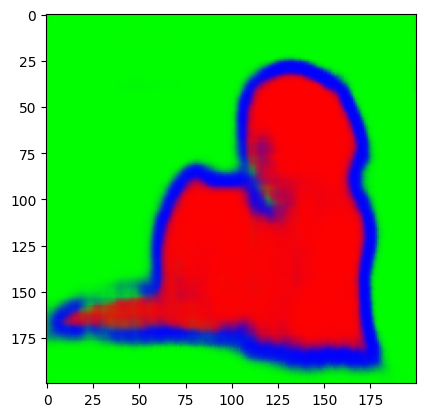

In [73]:
di = di.reshape(1,200,200,3)
mask = model.predict(di)[0]
plt.imshow(mask)
plt.show()

In [74]:
mask2 = mask.copy()
mask3 = cv2.cvtColor(mask2,cv2.COLOR_BGR2GRAY)
mask3.shape

(200, 200)

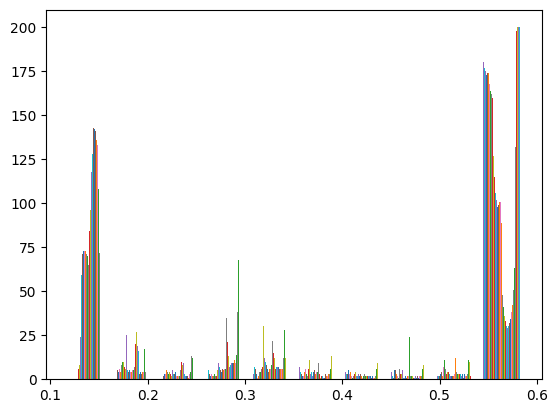

In [78]:
plt.hist(mask3)
plt.show()

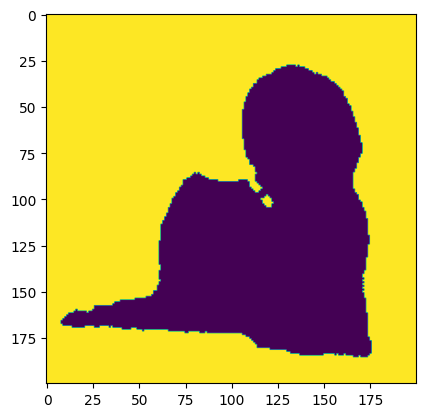

In [96]:
rm = np.zeros((200,200),dtype='uint8')
for r in range(200):
  for c in range(200):
      if mask3[r][c]<0.3 :
        rm[r][c] = 0
      else:
        rm[r][c] = 1
plt.imshow(rm)
plt.show()

In [92]:
di = di.reshape(200,200,3)

In [ ]:
plt.imshow(di.astype('uint8'))
plt.show()

In [94]:
di = di.reshape(200,200,3)

In [ ]:
dest = np.zeros((200,200,3),dtype='uint8')
for r in range(200):
  for c in range(200):
    if rm[r][c]!=1:
      dest[r][c][0] = di[r][c][0]
      dest[r][c][1] = di[r][c][1]
      dest[r][c][2] = di[r][c][2]
plt.imshow(dest)
plt.show()